## Imports

In [1]:
from helpers import *

# Models
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Scalers
from sklearn.preprocessing import MinMaxScaler

# Reading Data

In [2]:
# feature extraction parameters
opt = {
        'sharpness_factor': 10,
        'bordersize': 3,
        'show_images': False,
        'is_binary': False,
        'LBP_numPoints': 8,
        'LBP_radius':1,
        'LBP_method': 'uniform',
        'HOG_width': 64,
        'HOG_height': 128,
    }

In [3]:
X, Y = read_data("data_set", windows=False)

0start ..
1start ..


In [4]:
data_train, data_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Extraction

In [5]:
HOG_feature_training, HINGE_feature_training, COLD_feature_training = extract_features(imgs=data_train, options=opt)

/home/passantabdelgalil/Documents/gender-classification/cold_feature_extraction.py:127: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)


In [6]:
HOG_feature_testing, HINGE_feature_testing, COLD_feature_testing = extract_features(imgs=data_test, options=opt)

## Scaling Features

In [7]:
HOG_scaler = MinMaxScaler()
HOG_feature_training_scaled  = HOG_scaler.fit_transform(HOG_feature_training)
HOG_feature_testing_scaled = HOG_scaler.transform(HOG_feature_testing)

HINGE_scaler = MinMaxScaler()
HINGE_feature_training_scaled = HINGE_scaler.fit_transform(HINGE_feature_training)
HINGE_feature_testing_scaled = HINGE_scaler.transform(HINGE_feature_testing)

COLD_scaler = MinMaxScaler()
COLD_feature_training_scaled = COLD_scaler.fit_transform(COLD_feature_training)
COLD_feature_testing_scaled = COLD_scaler.transform(COLD_feature_testing)

### Export Scaled features

In [8]:
all_train_features = np.concatenate((HOG_feature_training_scaled, HINGE_feature_training_scaled), axis=1)
all_train_features = np.concatenate((all_train_features, COLD_feature_training_scaled), axis=1)

all_test_features = np.concatenate((HOG_feature_testing_scaled, HINGE_feature_testing_scaled), axis=1)
all_test_features = np.concatenate((all_test_features, COLD_feature_testing_scaled), axis=1)

In [82]:
import pandas as pd
pd.DataFrame(all_train_features).to_csv("data/train.csv", header=None, index=None)
pd.DataFrame(all_test_features).to_csv('data/test.csv', header=None, index=None)
pd.DataFrame(y_test).to_csv('data/test_classes.csv', header=None, index=None)
pd.DataFrame(y_train).to_csv('data/train_classes.csv', header=None, index=None)

## Training Model

#### Logistic Regression Classifier

In [70]:
clf2 =  LogisticRegression(random_state=42)
parameters2 = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

grid_clf2 = GridSearchCV(clf2, parameters2, scoring='f1', cv=5)
model = grid_clf2.fit(all_train_features, y_train)

#### LinearSVC

In [81]:
clf1 = LinearSVC(random_state=42)
parameters1 = {
    'C': np.logspace(-4, 4, 20)
}

grid_clf1 = GridSearchCV(clf1, parameters1, scoring='f1', cv=5)
model_svc = grid_clf1.fit(all_train_features, y_train)

modelname='models/best_svc_model_ever'
save_model(model_svc, modelname)

### Model Evaluation

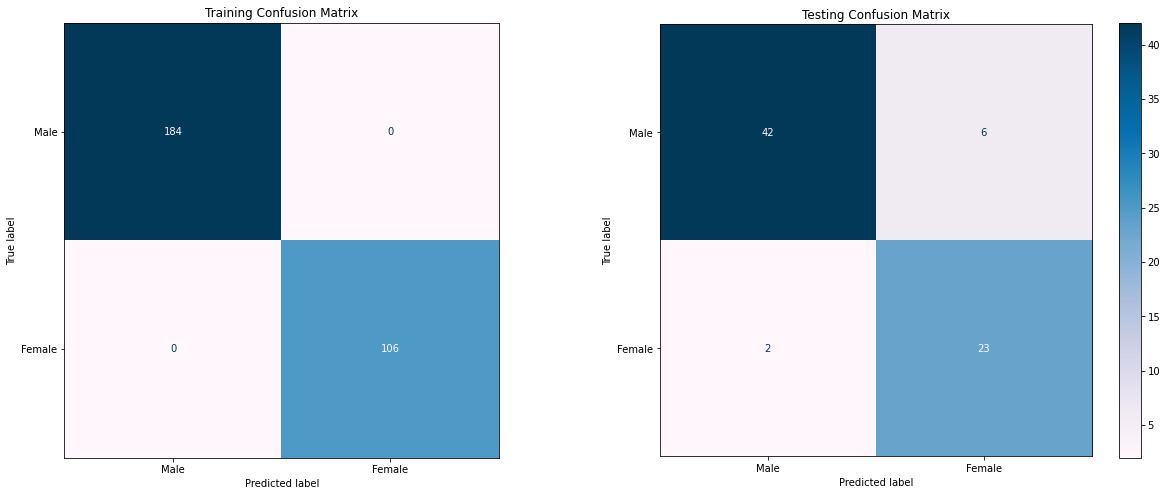

In [68]:


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
ConfusionMatrixDisplay.from_estimator(model, all_train_features, y_train, display_labels=['Male', 'Female'], ax=ax1, colorbar=False, cmap='PuBu')

ax1.set_title('Training Confusion Matrix')

im = ConfusionMatrixDisplay.from_estimator(model, all_test_features, y_test, display_labels=['Male', 'Female'], ax=ax2, colorbar=False, cmap='PuBu').im_

fig.subplots_adjust(right=1.5)
fig.colorbar(im)
ax2.set_title('Testing Confusion Matrix');

In [76]:
print(f"Training score is %0.2f%%"%(model.score(all_train_features, y_train) * 100))


test_pred = model.predict(all_test_features)
print(f"Testing accuracy is %0.2f%%"%(np.sum(test_pred == y_test)/len(y_test) * 100))

Training score is 100.00%
Testing accuracy is 89.04%


### Exporting Models to .sav files


In [80]:
import pickle

modelname = 'models/best_logistic_model_ever'
save_model(model, modelname)

HOG_scalername = 'models/HOG_scaler.sav'
HINGE_scalername = 'models/HINGE_scaler'
COLD_scalername = 'models/COLD_scaler.sav'

save_model(HOG_scaler, HOG_scalername)
save_model(HINGE_scaler, HINGE_scalername)
save_model(COLD_scaler, COLD_scalername)